In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1 Explore the Data

### 1. Load the data. Make sure you know the coding of all variables. In particular, you should be aware if a variable is categorical or numeric. Explain the coding scheme if it's not obvious.

In [2]:
titanic_dat = pd.read_csv('titanic.csv')
titanic_dat.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Understanding the columns in the dataset
titanic_dat.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
# Understanding the levels in each categorical variable
print("Survived:",titanic_dat['survived'].unique())
print("Sex levels:",titanic_dat['sex'].unique())
print("Pclass levels:",titanic_dat['pclass'].unique())
print("Parch levels:",titanic_dat['parch'].unique())
print("sibsp levels:",titanic_dat['sibsp'].unique())
print("embarked levels:",titanic_dat['embarked'].unique())

Survived: [1 0]
Sex levels: ['female' 'male']
Pclass levels: [1 2 3]
Parch levels: [0 2 1 4 3 5 6 9]
sibsp levels: [0 1 2 3 4 5 8]
embarked levels: ['S' 'C' nan 'Q']


In [5]:
# Understanding the coding scheme and missing values
titanic_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


### As most of the variables in the data are categorical, we cannot just compute means and correlations. Rather create a table along these lines where you list the averages for those who survived and those who died:

### 2. Create such a summary table. You may add more statistics you consider interesting to this table.

In [6]:
tred = titanic_dat.copy()
tred.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
s = []
d = []
tred['sex'] = (tred['sex'] == 'male') + 0
d.append(tred.groupby(['survived'])['sex'].mean()[0])
s.append(tred.groupby(['survived'])['sex'].mean()[1])

d.append(tred.groupby(['survived'])['pclass'].mean()[0])
s.append(tred.groupby(['survived'])['pclass'].mean()[1])

d.append(tred.groupby(['survived'])['sibsp'].mean()[0])
s.append(tred.groupby(['survived'])['sibsp'].mean()[1])

d.append(tred.groupby(['survived'])['parch'].mean()[0])
s.append(tred.groupby(['survived'])['parch'].mean()[1])

tred.dropna(subset=['embarked'])
tred['embarked'] = np.where(tred['embarked'] == 'S',0,np.where(tred['embarked']=='C', 1, 2))
d.append(tred.groupby(['survived'])['embarked'].mean()[0])
s.append(tred.groupby(['survived'])['embarked'].mean()[1])

In [8]:
n = []
n.append(titanic_dat['sex'].isnull().sum())
n.append(titanic_dat['pclass'].isnull().sum())
n.append(titanic_dat['sibsp'].isnull().sum())
n.append(titanic_dat['parch'].isnull().sum())
n.append(titanic_dat['embarked'].isnull().sum())

In [9]:
f = ['sex(=male)','pclass','sibsp','parch','embarked']
ff = pd.DataFrame({'Feature':f,'Survived':s,'Drowned':d,'Missing Values':n})
df1 = pd.DataFrame(data=ff, columns=['Feature','Survived','Drowned','Missing Values'])
df1

,Feature,Survived,Drowned,Missing Values
0,sex(=male),0.322,0.843016,0
1,pclass,1.962,2.500618,0
2,sibsp,0.462,0.521632,0
3,parch,0.476,0.328801,0
4,embarked,0.484,0.343634,2


## 2 Implement decision tree

### 2.1 Prepare data
### 1. Now select the variables you are going to use. Use those that may have influenced survival (such as class), or those that may be otherwise correlated with survival (like fare). Note: do not include explanatory variables that are result of survival/death, namely boat number and body number.

In [10]:
tt = titanic_dat.copy()

tt['sex'] = (tt['sex'] == 'male') + 0
tt['embarked'] = np.where(tt['embarked'] == 'S',0,np.where(tt['embarked']=='C', 1, 2))

dt = pd.DataFrame(data=tt, columns=['pclass','sex','age','fare','embarked','parch','sibsp','survived'])
dt.head()

,pclass,sex,age,fare,embarked,parch,sibsp,survived
0,1,0,29.0000,211.3375,0,0,0,1
1,1,1,0.9167,151.5500,0,2,1,1
2,1,0,2.0000,151.5500,0,2,1,0
3,1,1,30.0000,151.5500,0,2,1,0
4,1,0,25.0000,151.5500,0,2,1,0


### 2. Split your data into training/testing groups (80/20% or so).

In [11]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)

## 2.2 Implement the decision tree

### 1. Compute the entropy at the root, based of the total number of survivors and victims. You will use this number to compute entropy gain further below.

In [12]:
N = len(X_train)
N1 = len(X_train[X_train['survived'] == 1])   

E1 = -((N1/N) * np.log2(N1/N) + ((N - N1)/N) * np.log2((N - N1)/N))
print("Entropy at root:",E1)

Entropy at root: 0.955396536467


### 2. create an ordered vector of unique age values (a1, a2, . . . , ak). These will form the potential split points fo age. How many different age values do you find in your training data? Note: remember that there are missing age values!

In [13]:
t = X_train.copy()
t = t.dropna(subset=['age'])

a = sorted(t['age'].unique())
n = len(t['age'].unique())
print("Age values:",a)
print("Number of unique values in training dataset:",n)

Age values: [0.16669999999999999, 0.33329999999999999, 0.41670000000000001, 0.66669999999999996, 0.75, 0.83330000000000004, 0.91669999999999996, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 18.5, 19.0, 20.0, 21.0, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 26.5, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 38.5, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 60.5, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 70.0, 70.5, 71.0, 74.0, 76.0, 80.0]
Number of unique values in training dataset: 95


### 3. Split the (training) data into two groups:
(a) age 6 < a1 and
(b) age > a1.
### 4. Compute the entropy of this split.
### 5. Now repeat these steps with all possible age splits. Find the best age boundary, the split that gives you the lowest entropy.

In [14]:
def entropy(n1,n2):
    if n1 == 0:
        x11 = 0
    else:         
        x11 = np.log2(n1)
            
    if n2 == 0:
        x12 = 0
    else:         
        x12 = np.log2(n2)   
        
    return (-(n1 * x11 + n2 * x12))

In [15]:
def entropy_calc(a,t,v):
    f=[]
    j=[]
    avg1 = []
    avg2=[]
    N = len(t)
    #print(t.shape)
    #print(t)
    
    #print(len(a))
    
    if len(a) == 1:
        df1 = pd.Series({'Entropy':1e10,v:a,'Survived Average(Split 1)':-1,'Survived Average(Split 2)':-1})
        #print(df1)
        return(df1)
        
    else:
        for i in range(len(a)-1):
            #if a[i] == a[-1]:
                #break;
            #else:
                x1 = t[t[v] <= a[i]]
                x2 = t[t[v] > a[i]]
                #print(x1.shape,x2.shape)


                n11 = np.mean(x1['survived'])
                n12 = 1 - n11

                n21 = np.mean(x2['survived'])
                n22 = 1 - n21  

                e1 = entropy(n11,n12)
                e2 = entropy(n21,n22)

                f.append(((len(x1)) * e1 + (len(x2)) * e2)/N)
                j.append(a[i])
                avg1.append(np.mean(x1['survived']) * 100)
                avg2.append(np.mean(x2['survived']) * 100)

        df1 = pd.DataFrame({'Entropy':f,v:j,'Survived Average(Split 1)':avg1,'Survived Average(Split 2)':avg2})

        return(df1.loc[df1['Entropy'].idxmin()])

In [16]:
ee = []
ee.append(entropy_calc(a,t,v='age'))
ee

[Entropy                       0.956141
 Survived Average(Split 1)    65.573770
 Survived Average(Split 2)    38.039216
 age                           8.000000
 Name: 14, dtype: float64]

### 6. Repeat the previous steps over all explanatory variables in your data. For each variable, store (and print) the best split value and the corresponding entropy.

In [17]:
t = X_train.copy()
t = t.dropna(subset=['pclass'])

a = sorted(t['pclass'].unique())
n = len(t['pclass'].unique())
print("Pclass values:",a)
print("Number of unique values in training dataset:",n)

ee.append(entropy_calc(a,t,v='pclass'))

Pclass values: [1, 2, 3]
Number of unique values in training dataset: 3


In [18]:
t = X_train.copy()
t = t.dropna(subset=['embarked'])

a = sorted(t['embarked'].unique())
n = len(t['embarked'].unique())
print("embarked values:",a)
print("Number of unique values in training dataset:",n)

ee.append(entropy_calc(a,t,v='embarked'))

embarked values: [0, 1, 2]
Number of unique values in training dataset: 3


In [19]:
t = X_train.copy()
t = t.dropna(subset=['sex'])

a = sorted(t['sex'].unique())
n = len(t['sex'].unique())
print("Sex values:",a)
print("Number of unique values in training dataset:",n)

ee.append(entropy_calc(a,t,v='sex'))

Sex values: [0, 1]
Number of unique values in training dataset: 2


In [20]:
t = X_train.copy()
t = t.dropna(subset=['fare'])

a = sorted(t['fare'].unique())
n = len(t['fare'].unique())
#print("Fare values:",a)
print("Number of unique values in training dataset:",n)

ee.append(entropy_calc(a,t,v='fare'))

Number of unique values in training dataset: 250


In [21]:
t = X_train.copy()
t = t.dropna(subset=['sibsp'])

a = sorted(t['sibsp'].unique())
n = len(t['sibsp'].unique())
print("Siblings/Spouse values:",a)
print("Number of unique values in training dataset:",n)

ee.append(entropy_calc(a,t,v='sibsp'))

Siblings/Spouse values: [0, 1, 2, 3, 4, 5, 8]
Number of unique values in training dataset: 7


In [22]:
t = X_train.copy()
t = t.dropna(subset=['parch'])

a = sorted(t['parch'].unique())
n = len(t['parch'].unique())
print("Parch values:",a)
print("Number of unique values in training dataset:",n)

ee.append(entropy_calc(a,t,v='parch'))

Parch values: [0, 1, 2, 3, 4, 5, 6, 9]
Number of unique values in training dataset: 8


In [23]:
a1=[]
b1=[]
c1=[]
s1=[]
s2=[]
for i in range(len(ee)-1):
    a1.append(ee[i]['Entropy'])
    b1.append(ee[i][3])
    c1.append(ee[i].index.values[3])
    s1.append(ee[i][1])
    s2.append(ee[i][2])
    
dd = pd.DataFrame({'Entropy':a1,'Splitting Value':b1,'Feature':c1,'Survived Avg. (Split 1)':s1,'Survived Avg. (Split 2)':s2})
dd = pd.DataFrame(dd, columns=['Feature','Entropy','Splitting Value','Survived Avg. (Split 1)','Survived Avg. (Split 2)'])
dd

,Feature,Entropy,Splitting Value,Survived Avg. (Split 1),Survived Avg. (Split 2)
0,age,0.956141,8.0,65.573770,38.039216
1,pclass,0.892043,2.0,53.249476,24.561404
2,embarked,0.936281,0.0,32.267038,49.390244
3,sex,0.766312,0.0,70.889488,19.378698
4,fare,0.884421,15.1,23.161765,53.386454
5,sibsp,0.943208,0.0,33.239038,46.764706


### 7. Now pick the feature that gives the largest entropy gain. This gives you the first split (tree stump). Show the name of the feature, the resulting entropy, and the split position. Print the survived/non-survived percentage in both branches.

In [24]:
print("\nFeature with larget Entropy gain:")
dd.loc[dd['Entropy'].idxmin()]


Feature with larget Entropy gain:


Feature                         sex
Entropy                    0.766312
Splitting Value                   0
Survived Avg. (Split 1)     70.8895
Survived Avg. (Split 2)     19.3787
Name: 3, dtype: object

### 8. Create such a recursive function we discussed in the class that takes in data and returns a tree.

In [25]:
def terminal_cond(X,y):
    #print(set(y['survived']))
    if set(y['survived']) == {1}:
        return(1)
    elif set(y['survived']) == {0}:
        return(0)    
    elif X.empty or (len(X) <= 50):
        #print(np.mean(y['survived']))
        #print(y.shape)
        if np.mean(y['survived']) > 0.5:
            return(1)
        else:
            return(0)
    else:
        return(-1)

In [26]:
def best_attr(X,y):
    ee=[]
    aa=[]
    bb=[]
    cc=[]
    t = pd.concat([X, y], axis=1, join_axes=[X.index])
    col_val = X.columns.values
    for col in col_val:
        t = t.copy()
        t = t.dropna(subset=[col])
        #print(t.columns, t.shape)
        a = sorted(t[col].unique())
        n = len(t[col].unique())
        #print(col)
        ee.append(entropy_calc(a,t,v=col))
    for ele in ee:
        aa.append(ele['Entropy'])
        bb.append(ele.index.values[3])
        cc.append(ele[3])
    f = pd.DataFrame({'Entropy':aa,'Feature':bb,'SV':cc})
    #print(f)
    #print(f.loc[f['Entropy'].idxmin()])
    return(f.loc[f['Entropy'].idxmin()])

In [27]:
def build_tree(X,y):
    lf = terminal_cond(X,y)
    if lf == 1 or lf == 0:
        return([lf])
    else:
        #print("Xshape",X.shape)
        #print("Xcols",X.columns)
        j = best_attr(X,y)
        #print(j['Feature'])
        #print(j['SV'])
        XX = pd.concat([X,y],axis=1,join_axes=[X.index])
        XX_new = XX[XX[j['Feature']] <= j['SV']]
        X1 = pd.DataFrame(XX_new.drop(['survived'],axis=1))
        y1 = pd.DataFrame(XX_new['survived'])
            
        #print(X1.head())
        XX2_new = XX[XX[j['Feature']] > j['SV']]
        X2 = pd.DataFrame(XX2_new.drop(['survived'],axis=1))
        y2 = pd.DataFrame(XX2_new['survived'])

        return([j['Feature'],j['SV'],build_tree(X1,y1),build_tree(X2,y2)])     

In [28]:
X = X_train.drop(['survived'],axis=1)
y = pd.DataFrame(X_train['survived'])

tree = build_tree(X,y)
tree

['sex',
 0.0,
 ['pclass',
  2.0,
  ['fare',
   26.0,
   ['age',
    55.0,
    ['age', 44.0, ['age', 42.0, ['age', 17.0, [1], [1]], [0]], [1]],
    [0]],
   ['fare', 146.52080000000001, ['fare', 31.679200000000002, [1], [1]], [1]]],
  ['fare',
   7.5499999999999998,
   [1],
   ['age',
    0.75,
    [1],
    ['fare',
     31.387499999999999,
     ['fare',
      31.274999999999999,
      ['fare',
       22.024999999999999,
       ['fare', 14.5, ['age', 27.0, [0], [0]], [1]],
       [0]],
      [1]],
     [0]]]]],
 ['pclass',
  1.0,
  ['age',
   13.0,
   [1],
   ['fare', 134.5, ['age', 38.0, [0], ['age', 44.0, [0], [0]]], [0]]],
  ['age',
   9.0,
   [1],
   ['age',
    32.0,
    ['age',
     30.0,
     ['embarked',
      0.0,
      ['fare',
       10.5,
       ['age',
        14.0,
        [1],
        ['fare',
         7.5208000000000004,
         [0],
         ['fare',
          7.7957999999999998,
          [0],
          ['fare', 7.8958000000000004, [0], ['age', 20.0, [0], [0]]]]]],
  

### 9. Visualize the two top levels of branches of your tree. 
Try to make the result readable (I don't ask anything like fancy graphical results) but ensuring that one decision is on a single line, and adding a little manual indentation will make a large step toward making the tree readable. Comment the outcome. Does it make sense? Which variables seem to be more important?

In [29]:
print("             " + tree[0])
print("           (" , tree[1],")")
print("             /"+ "" +  " \         ")
print("            /"+ "" +  "   \         ")
print("     " ,tree[2][0], "    " , tree[3][0])
print("     (" ,tree[2][1], ")       (" , tree[3][1],")")
print("       /"+ "" +  "  \         " + " /"+ "" +  " \         " )
print("      /"+ "" +  "    \       " + " /"+ "" +  "   \         " )
print("  " +tree[2][2][0] +"    "+ tree[2][2][3][0] + "    " + tree[3][2][0] +"     "+ "[1]")
print("(",tree[2][2][1] ,")(",tree[2][2][3][1] ,")(",tree[3][2][1],")" )

             sex
           ( 0.0 )
             / \         
            /   \         
      pclass      pclass
     ( 2.0 )       ( 1.0 )
       /  \          / \         
      /    \        /   \         
  fare    fare    age     [1]
( 26.0 )( 146.5208 )( 13.0 )


<p>Based on the top two level of the branches of the tree, we can say that pclass and fare seems to be best split features. However, we do have a lot of splitting at the age features after level two. Hence, pclass, fare and age can be said to be providing maximum information gain. It makes sense as well because people may had been given preference to onboard a life boat based on their age, passenger class and fare they paid.

### 10. Predict (based on training data) using your tree. Compute accuracy, precision and recall.
Note: you have to create a function that walks through the nested list based on a single observation.
As the decisions dier between individual observations, we cannot easily vectorize the operation. A
set of loops is necessary (can be done in parallel).

In [30]:
def predict(row, tree):
    if len(tree) == 1:
        return(tree[0])
    else:
        #print(tree[0])
        #print(tree[1])
        if row[tree[0]] <= tree[1]:
            
            return(predict(row,tree[2]))
        else:
            return(predict(row,tree[3]))

In [31]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

,pclass,sex,age,fare,embarked,parch,sibsp,survived
62,1,1,46.0,61.175,0,0,1,0
503,2,1,19.0,10.500,0,0,0,1
745,3,0,30.0,6.950,2,0,0,1
1154,3,1,NaN,8.050,0,0,0,0
826,3,1,1.0,46.900,0,2,5,0


In [32]:
pred = []
for i in range(len(X_train)):
    row = X_train.iloc[i,]
    pred.append(predict(row,tree))

X_train['pred'] = pred
vals = pd.crosstab(X_train['survived'],X_train['pred'])

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
tn = vals[0][0]
fp = vals[1][0]
tp = vals[1][1]
fn = vals[0][1]

In [34]:
print("Accuracy:",np.mean(X_train['survived'] == X_train['pred']))
print("Precision:",tp/(tp+fp))
print("Recall:",tp/(tp+fn))

Accuracy: 0.819484240688
Precision: 0.864768683274
Recall: 0.616751269036


## 3 Bagging and Random Forests

### 3.1 Bagging

### 1. Create a small number B of bagging trees (B = 5 is a good choice).
Note: as your tree algorithm may be slow, use this to measure and boost the speed. Suggestions
to improve the speed are a) use fewer features (but keep age, class, sex); b) use a larger minimum
number of observations for splits (say, 100); and c) run your tree-growing code in parallel.

In [35]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

,pclass,sex,age,fare,embarked,parch,sibsp,survived
62,1,1,46.0,61.175,0,0,1,0
503,2,1,19.0,10.500,0,0,0,1
745,3,0,30.0,6.950,2,0,0,1
1154,3,1,NaN,8.050,0,0,0,0
826,3,1,1.0,46.900,0,2,5,0


In [36]:
B = 5
preds = []

for i in range(B):
    t = X_train.sample(n=len(X_train),replace=True,random_state = i+1)
    X = pd.DataFrame(t.drop(['survived'],axis=1))
    y = pd.DataFrame(t['survived'])
    tree = build_tree(X,y)
    
    pred = []
    for i in range(len(X_test)):
        row = X_test.iloc[i,]
        pred.append(predict(row,tree))
    
    X_test['pred'] = pred
    
    preds.append(pred)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### 2. predict (on test data) the survival according to each individual tree.

In [37]:
dd = pd.DataFrame({'pred1':preds[0],'pred2':preds[1],'pred3':preds[2],'pred4':preds[3],'pred5':preds[4]})
dd.head()

,pred1,pred2,pred3,pred4,pred5
0,0,0,0,0,0
1,0,0,0,0,0
2,1,1,1,1,1
3,1,1,0,1,1
4,1,1,1,1,1


### 3. Show some aggregate statistics: in how many cases all trees agree?

In [38]:
n = (dd.duplicated() + 0).sum()
print("Number of cases where all the trees agree:",n)
print("Number of cases where they don't agree:",(len(X_test) - n))

Number of cases where all the trees agree: 243
Number of cases where they don't agree: 19


### 4. Find your final prediction: the majority vote over all trees. Compute accuracy, precision, recall. Did you get better results than in case of the single tree?

In [39]:
dd['Avg_Pred'] = (dd.mean(axis=1) >=0.5)+0
dd.head()

,pred1,pred2,pred3,pred4,pred5,Avg_Pred
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,0,1,1,1
4,1,1,1,1,1,1


In [40]:
vals = pd.crosstab(X_test['survived'],dd['Avg_Pred'])
tn = vals[0][0]
fp = vals[1][0]
tp = vals[1][1]
fn = vals[0][1]

print("Accuracy:",np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
print("Precision:",tp/(tp+fp))
print("Recall:",tp/(tp+fn))

Accuracy: 0.793893129771
Precision: 0.705882352941
Recall: 0.324324324324


#### No, the results didn't improve from the single tree case.

### 5. Repeat the process above with a large range of B, say, between 1 and 300. 
(Hint: you don't have to test every single number between 1 and 300. Choose numbers that make this not too slow on your
computer.) For each B, compute accuracy, precision, recall.

In [41]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

,pclass,sex,age,fare,embarked,parch,sibsp,survived
62,1,1,46.0,61.175,0,0,1,0
503,2,1,19.0,10.500,0,0,0,1
745,3,0,30.0,6.950,2,0,0,1
1154,3,1,NaN,8.050,0,0,0,0
826,3,1,1.0,46.900,0,2,5,0


In [42]:
B = 100
preds = []

for i in range(B):
    t = X_train.sample(n=len(X_train),replace=True)
    X = pd.DataFrame(t.drop(['survived'],axis=1))
    y = pd.DataFrame(t['survived'])
    tree = build_tree(X,y)
    
    pred = []
    for i in range(len(X_test)):
        row = X_test.iloc[i,]
        pred.append(predict(row,tree))
    
    X_test['pred'] = pred
    
    preds.append(pred)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
dd = pd.DataFrame()

In [44]:
for i in range(B):
    dd['Pred'+str(i+1)]=preds[i]

In [45]:
n = (dd.duplicated() + 0).sum()
print("Number of cases where all the trees agree:",n)
print("Number of cases where they don't agree:",(len(X_test) - n))

Number of cases where all the trees agree: 77
Number of cases where they don't agree: 185


In [46]:
dd['Avg_Pred'] = (dd.mean(axis=1) >=0.5)+0
dd.head()
vals = pd.crosstab(X_test['survived'],dd['Avg_Pred'])
tn = vals[0][0]
fp = vals[1][0]
tp = vals[1][1]
fn = vals[0][1]

print("Accuracy:",np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
print("Precision:",tp/(tp+fp))
print("Recall:",tp/(tp+fn))

Accuracy: 0.786259541985
Precision: 0.722222222222
Recall: 0.351351351351


In [47]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

,pclass,sex,age,fare,embarked,parch,sibsp,survived
62,1,1,46.0,61.175,0,0,1,0
503,2,1,19.0,10.500,0,0,0,1
745,3,0,30.0,6.950,2,0,0,1
1154,3,1,NaN,8.050,0,0,0,0
826,3,1,1.0,46.900,0,2,5,0


In [52]:
B = 200
preds = []

for i in range(B):
    t = X_train.sample(n=len(X_train),replace=True,random_state = i+1)
    X = pd.DataFrame(t.drop(['survived'],axis=1))
    y = pd.DataFrame(t['survived'])
    tree = build_tree(X,y)

    pred = []
    for i in range(len(X_test)):
        row = X_test.iloc[i,]
        pred.append(predict(row,tree))

    X_test['pred'] = pred

    preds.append(pred)

dd = pd.DataFrame()
for i in range(B):
    dd['Pred'+str(i+1)]=preds[i]

n = (dd.duplicated() + 0).sum()
print("Number of cases where all the trees agree:",n)
print("Number of cases where they don't agree:",(len(X_test) - n))

dd['Avg_Pred'] = (dd.mean(axis=1) >=0.5)+0
dd.head()
vals = pd.crosstab(X_test['survived'],dd['Avg_Pred'])
tn = vals[0][0]
fp = vals[1][0]
tp = vals[1][1]
fn = vals[0][1]

print("Accuracy:",np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
print("Precision:",tp/(tp+fp))
print("Recall:",tp/(tp+fn))

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Number of cases where all the trees agree: 63
Number of cases where they don't agree: 199
Accuracy: 0.778625954198
Precision: 0.6875
Recall: 0.297297297297


### 6. Show on a figure how A, P, R depend on the B.

In [56]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

a1=[]
p1=[]
r1=[]
b1=[]

for B in range(1,150,20):
    print(B)
    preds=[]

    for i in range(B):
        t = X_train.sample(n=len(X_train),replace=True,random_state = i+1)
        X = pd.DataFrame(t.drop(['survived'],axis=1))
        y = pd.DataFrame(t['survived'])
        tree = build_tree(X,y)
    
        pred = []
        #print(tree)
        
        for j in range(len(X_test)):
            row = X_test.iloc[j,]
            pred.append(predict(row,tree))
    
        X_test['pred'] = pred
    
        preds.append(pred)       
    #print(pred)
    
    dd = pd.DataFrame()
    
    for k in range(B):
        #print(k)
        dd['Pred'+str(k+1)]=preds[k]
    
    dd['Avg_Pred'] = (dd.mean(axis=1) >=0.5)+0
    
    #print(dd)

    vals = pd.crosstab(X_test['survived'],dd['Avg_Pred'])
    #print(vals)
    tn = vals[0][0]
    fp = vals[1][0]
    tp = vals[1][1]
    fn = vals[0][1]
    

    #print("Accuracy:",np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
    #print("Precision:",tp/(tp+fp))
    #print("Recall:",tp/(tp+fn)) 
    
    a1.append(np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
    p1.append(tp/(tp+fp))
    r1.append(tp/(tp+fn))
    b1.append(B)

1


C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


21
41
61
81
101
121
141


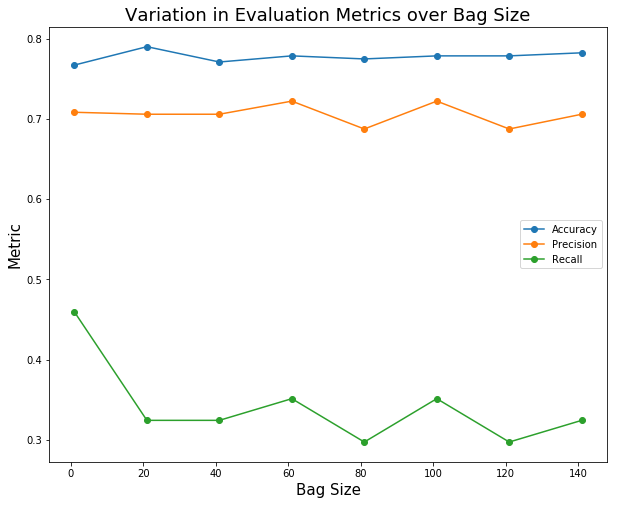

In [57]:
x = [i for i in range(1,150,20)]

plt.figure(figsize=(10,8))
plt.plot(x, a1,'-o')
plt.plot(x, p1,'-o')
plt.plot(x, r1,'-o')

plt.legend(['Accuracy', 'Precision', 'Recall'], loc='right')
plt.xlabel("Bag Size", fontsize=15)
plt.ylabel("Metric", fontsize=15)
plt.title("Variation in Evaluation Metrics over Bag Size", fontsize=18)

plt.show()

### 7. Discuss your findings. What is the optimal bag size B?

<p> Based on the plot abaove, we receive higher values for accuracy, preision and recall for lower bag sizes. Recall and precision varie a lot overall. However, accuracy becomes fairly constant at higher values of Bag size indicating no effect of increasing the bag size on accuracy. 

<p> We get the highest accuracy around bag size of 20 while recall is highest at 1 bag size and precision is highest at around 100 bag size.

## 3.2 Random Forests

### 1. Implement random tree algorithm by changing your previous growTree algorithm. We refer the new version as growForestTree.
Note: depending on how you implemented the data structures and the prediction algorithm, you
may have to adjust the prediction function too.

In [58]:
def terminal_cond1(X,y):
    #print(set(y['survived']))
    if set(y['survived']) == {1}:
        return(1)
    elif set(y['survived']) == {0}:
        return(0)    
    elif (len(X) <= 100):
        #print(np.mean(y['survived']))
        #print(y.shape)
        if np.mean(y['survived']) > 0.5:
            return(1)
        else:
            return(0)
    else:
        return(-1)

In [59]:
def best_attr1(X,y):
    ee=[]
    aa=[]
    bb=[]
    cc=[]
    t = pd.concat([X, y], axis=1, join_axes=[X.index])
    #print(t)
    
    col_val = np.random.choice(X.columns.values,int(round(np.sqrt(len(X.columns.values)))),replace=False)
    #print(col_val)
    for col in col_val:
        #print(col)
        t = t.copy()
        #print(t.head())
        t = t.dropna(subset=[col])
        #print(t.columns, t.shape)
        a = sorted(t[col].unique())
        n = len(t[col].unique())
        #print(col)
        ee.append(entropy_calc(a,t,v=col))
    for ele in ee:
        aa.append(ele['Entropy'])
        bb.append(ele.index.values[3])
        cc.append(ele[3])
    f = pd.DataFrame({'Entropy':aa,'Feature':bb,'SV':cc})
    #print(f)
    #print(f.loc[f['Entropy'].idxmin()])
    return(f.loc[f['Entropy'].idxmin()])

In [60]:
def growforesttree(X,y):
    lf = terminal_cond1(X,y)
    if lf == 1 or lf == 0:
        return([lf])
    else:
        #print("Xshape",X.shape)
        #print("Xcols",X.columns)
        j = best_attr1(X,y)
        #print(j['Feature'])
        #print(j['SV'])
        XX = pd.concat([X,y],axis=1,join_axes=[X.index])
        #print(XX.head())
        XX_new = XX[XX[j['Feature']] <= j['SV']]
        X1 = pd.DataFrame(XX_new.drop(['survived'],axis=1))
        y1 = pd.DataFrame(XX_new['survived'])
            
        #print(X1.head())
        XX2_new = XX[XX[j['Feature']] > j['SV']]
        X2 = pd.DataFrame(XX2_new.drop(['survived'],axis=1))
        y2 = pd.DataFrame(XX2_new['survived'])
        
        #print(X1.head())

        return([j['Feature'],j['SV'],growforesttree(X1,y1),growforesttree(X2,y2)])

In [61]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

,pclass,sex,age,fare,embarked,parch,sibsp,survived
62,1,1,46.0,61.175,0,0,1,0
503,2,1,19.0,10.500,0,0,0,1
745,3,0,30.0,6.950,2,0,0,1
1154,3,1,NaN,8.050,0,0,0,0
826,3,1,1.0,46.900,0,2,5,0


In [62]:
B = 5
preds = []

for i in range(B):
    t = X_train.sample(n=len(X_train),replace=True,random_state = i+1)
    X = pd.DataFrame(t.drop(['survived'],axis=1))
    y = pd.DataFrame(t['survived'])
    tree = growforesttree(X,y)
    
    pred = []
    for i in range(len(X_test)):
        row = X_test.iloc[i,]
        pred.append(predict(row,tree))
    
    X_test['pred'] = pred
    
    preds.append(pred)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [63]:
dd = pd.DataFrame()
for i in range(B):
    dd['Pred'+str(i+1)]=preds[i]
    
n = (dd.duplicated() + 0).sum()
print("Number of cases where all the trees agree:",n)
print("Number of cases where they don't agree:",(len(X_test) - n))

Number of cases where all the trees agree: 238
Number of cases where they don't agree: 24


In [64]:
dd['Avg_Pred'] = (dd.mean(axis=1) >=0.5)+0
dd.head()
vals = pd.crosstab(X_test['survived'],dd['Avg_Pred'])
tn = vals[0][0]
fp = vals[1][0]
tp = vals[1][1]
fn = vals[0][1]

print("Accuracy:",np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
print("Precision:",tp/(tp+fp))
print("Recall:",tp/(tp+fn))

Accuracy: 0.770992366412
Precision: 0.714285714286
Recall: 0.27027027027


### 2. Create random forests of different size B. Ideally you want to go up to B = 1000, but you may need to keep the number much smaller in order to finish in a reasonable time. For each B, compute accuracy, precision, recall.

In [65]:
X_train, X_test= train_test_split(dt, test_size=0.20, random_state=1)
X_train.head()

a=[]
p=[]
r=[]
b=[]

for B in range(1,150,20):
    preds = []
    print(B)

    for i in range(B):
        t = X_train.sample(n=len(X_train),replace=True,random_state = i+1)
        X = pd.DataFrame(t.drop(['survived'],axis=1))
        y = pd.DataFrame(t['survived'])
        tree = growforesttree(X,y)
    
        pred = []
        for i in range(len(X_test)):
            row = X_test.iloc[i,]
            pred.append(predict(row,tree))
    
        X_test['pred'] = pred
    
        preds.append(pred)
    dd = pd.DataFrame()
    
    for i in range(B):
        dd['Pred'+str(i+1)]=preds[i]
    
    n = (dd.duplicated() + 0).sum()
    print("Number of cases where all the trees agree:",n)
    print("Number of cases where they don't agree:",(len(X_test) - n))
    
    
    dd['Avg_Pred'] = (dd.mean(axis=1) >=0.5)+0
    dd.head()
    vals = pd.crosstab(X_test['survived'],dd['Avg_Pred'])
    tn = vals[0][0]
    fp = vals[1][0]
    tp = vals[1][1]
    fn = vals[0][1]

    #print("Accuracy:",np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
    #print("Precision:",tp/(tp+fp))
    #print("Recall:",tp/(tp+fn))
    
    a.append(np.mean(X_test['survived'].values == dd['Avg_Pred'].values))
    p.append(tp/(tp+fp))
    r.append(tp/(tp+fn))
    b.append(B)

1


C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Number of cases where all the trees agree: 260
Number of cases where they don't agree: 2
21
Number of cases where all the trees agree: 180
Number of cases where they don't agree: 82
41
Number of cases where all the trees agree: 134
Number of cases where they don't agree: 128
61
Number of cases where all the trees agree: 102
Number of cases where they don't agree: 160
81
Number of cases where all the trees agree: 92
Number of cases where they don't agree: 170
101
Number of cases where all the trees agree: 85
Number of cases where they don't agree: 177
121
Number of cases where all the trees agree: 74
Number of cases where they don't agree: 188
141
Number of cases where all the trees agree: 72
Number of cases where they don't agree: 190


### 3. Show on a figure how A, P, R depend on the B. Include the bagging outcomes on the same figure too.
### 4. Discuss your findings. What is the optimal forest size? Are random forests superior to bagging?

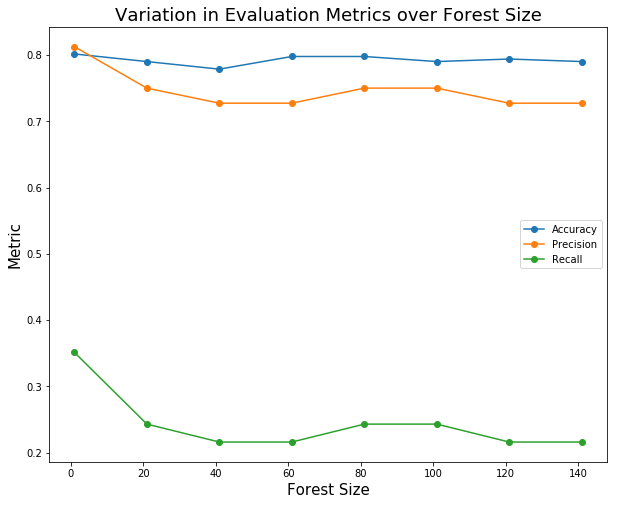

In [66]:
x = [i for i in range(1,150,20)]

plt.figure(figsize=(10,8))
plt.plot(x, a,'-o')
plt.plot(x, p,'-o')
plt.plot(x, r,'-o')

plt.legend(['Accuracy', 'Precision', 'Recall'], loc='right')
plt.xlabel("Forest Size", fontsize=15)
plt.ylabel("Metric", fontsize=15)
plt.title("Variation in Evaluation Metrics over Forest Size", fontsize=18)

plt.show()

<p> Even with Random Forest, we don't see significant improvement over single tree case, as we are still getting values in the same range. However, we do see better results and lesser variation as compared to just bagging.